In [250]:
import pandas as pd
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

In [349]:
df = pd.read_csv("economy.csv")
df.index = df.index + 1
df

,Year,VVP,Earning,VVPC
1,1997,79,106,72
2,1998,76,91,71
3,1999,75,90,71
4,2000,72,85,69
5,2001,70,82,67
6,2002,68,81,66
7,2003,66,81,63
8,2003,63,70,56
9,2004,56,51,58
10,2005,56,64,60


In [351]:
#df.drop(df.columns[[0]], axis=1, inplace=True)
df.describe()

,VVP,Earning,VVPC
count,21.000000,21.000000,21.000000
mean,55.142857,61.476190,55.285714
std,14.728495,21.830298,11.252301
min,36.000000,34.000000,40.000000
25%,41.000000,43.000000,45.000000
50%,56.000000,52.000000,56.000000
75%,68.000000,81.000000,66.000000
max,79.000000,106.000000,72.000000


In [352]:
print('VVP -', stats.gmean(df,axis=0)[0])
print('Earning -', stats.gmean(df,axis=0)[1])
print('VVPC -', stats.gmean(df,axis=0)[2])

VVP - 53.2450805368
Earning - 57.9051576817
VVPC - 54.1866644721


In [353]:
print(df.var())
#df.plot.scatter(x='X2', y='X1', c='X3', colormap='viridis')

VVP        216.928571
Earning    476.561905
VVPC       126.614286
dtype: float64


In [354]:
df.median()

VVP        56.0
Earning    52.0
VVPC       56.0
dtype: float64

In [355]:
df.std()

VVP        14.728495
Earning    21.830298
VVPC       11.252301
dtype: float64

In [356]:
df.mode()

,VVP,Earning,VVPC
0,36,43.0,42.0
1,39,81.0,45.0
2,41,NaN,71.0
3,56,NaN,NaN


In [357]:
df.kurtosis()

VVP       -1.466879
Earning   -1.106878
VVPC      -1.493281
dtype: float64

VVP        0.144523
Earning    0.468483
VVPC       0.107096
dtype: float64


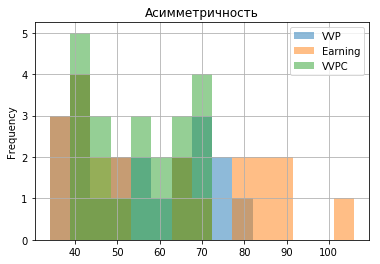

In [358]:
skew = df.skew()
print(skew)
df.plot.hist(alpha=0.5, bins=15, grid=True)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.title("Асимметричность")
plt.show()

In [361]:
summa = 0
prev = 1

for i, row in df.iterrows():
    summa+= (row['VVP'] - df['VVP'].mean()) ** 2
        
dis = math.sqrt(summa / (df['VVP'].count() - 1))
print('Среднеквадратическое отклонение - ', dis)

for i, row in df.iterrows():
    raz = abs(row['VVP'] - df['VVP'][prev]) / dis
    prev = i
    print('λ -', raz)
    

Среднеквадратическое отклонение -  14.728495219423179
λ - 0.0
λ - 0.203686795922
λ - 0.0678955986407
λ - 0.203686795922
λ - 0.135791197281
λ - 0.135791197281
λ - 0.135791197281
λ - 0.203686795922
λ - 0.475269190485
λ - 0.0
λ - 0.203686795922
λ - 0.407373591844
λ - 0.271582394563
λ - 0.203686795922
λ - 0.339477993204
λ - 0.135791197281
λ - 0.0678955986407
λ - 0.203686795922
λ - 0.339477993204
λ - 0.0
λ - 0.203686795922


In [366]:
for i in range(1, 19):
    print('Лаг - ', i, 'Значение - ', df['VVP'].autocorr(lag=i))

Лаг -  1 Значение -  0.981373286937
Лаг -  2 Значение -  0.964370228194
Лаг -  3 Значение -  0.961613693715
Лаг -  4 Значение -  0.94371558181
Лаг -  5 Значение -  0.929335153273
Лаг -  6 Значение -  0.923449669253
Лаг -  7 Значение -  0.933986311094
Лаг -  8 Значение -  0.89752354335
Лаг -  9 Значение -  0.868774601926
Лаг -  10 Значение -  0.883887418394
Лаг -  11 Значение -  0.818739913705
Лаг -  12 Значение -  0.712511265007
Лаг -  13 Значение -  0.702515263087
Лаг -  14 Значение -  0.517542399136
Лаг -  15 Значение -  0.370218782482
Лаг -  16 Значение -  0.134412973091
Лаг -  17 Значение -  0.329983164554
Лаг -  18 Значение -  -0.693375245282


In [379]:
X = [i for i in range(1, 22)]
Y = df['VVP']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    VVP   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     500.1
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           4.14e-15
Time:                        15:57:23   Log-Likelihood:                -51.039
No. Observations:                  21   AIC:                             106.1
Df Residuals:                      19   BIC:                             108.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.7714      1.308     61.746      0.0

In [381]:
X = [i for i in range(1, 22)]
Y = df['Earning']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Earning   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     72.95
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           6.26e-08
Time:                        15:58:04   Log-Likelihood:                -77.478
No. Observations:                  21   AIC:                             159.0
Df Residuals:                      19   BIC:                             161.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.9476      4.607     20.826      0.0

In [382]:
X = [i for i in range(1, 22)]
Y = df['VVPC']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   VVPC   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     508.6
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           3.55e-15
Time:                        15:58:44   Log-Likelihood:                -45.217
No. Observations:                  21   AIC:                             94.43
Df Residuals:                      19   BIC:                             96.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.8714      0.991     75.524      0.0

In [401]:
trends = pd.DataFrame({'VVP': df['VVP'], 
                       'VVPT': [i * -2.3299 + 80.7714 for i, row in df.iterrows()]
                      })

trends['ВВП случ состав'] = [row['VVP'] - trends['VVPT'][i] for i, row in df.iterrows()]

print(trends)
#trends.head(32)

    VVP     VVPT  ВВП случ состав
1    79  78.4415           0.5585
2    76  76.1116          -0.1116
3    75  73.7817           1.2183
4    72  71.4518           0.5482
5    70  69.1219           0.8781
6    68  66.7920           1.2080
7    66  64.4621           1.5379
8    63  62.1322           0.8678
9    56  59.8023          -3.8023
10   56  57.4724          -1.4724
11   59  55.1425           3.8575
12   53  52.8126           0.1874
13   49  50.4827          -1.4827
14   46  48.1528          -2.1528
15   41  45.8229          -4.8229
16   39  43.4930          -4.4930
17   38  41.1631          -3.1631
18   41  38.8332           2.1668
19   36  36.5033          -0.5033
20   36  34.1734           1.8266
21   39  31.8435           7.1565


In [389]:
trends = pd.DataFrame({'Earning': df['Earning'], 
                       'EarningT': [i * -3.1338 + 95.9476 for i, row in df.iterrows()]
                      })

trends['Доход случ состав'] = [row['Earning'] - trends['EarningT'][i] for i, row in df.iterrows()]

print(trends)

    Earning  EarningT  Доход случ состав
1       106   92.8138            13.1862
2        91   89.6800             1.3200
3        90   86.5462             3.4538
4        85   83.4124             1.5876
5        82   80.2786             1.7214
6        81   77.1448             3.8552
7        81   74.0110             6.9890
8        70   70.8772            -0.8772
9        51   67.7434           -16.7434
10       64   64.6096            -0.6096
11       66   61.4758             4.5242
12       48   58.3420           -10.3420
13       43   55.2082           -12.2082
14       38   52.0744           -14.0744
15       34   48.9406           -14.9406
16       36   45.8068            -9.8068
17       42   42.6730            -0.6730
18       47   39.5392             7.4608
19       43   36.4054             6.5946
20       41   33.2716             7.7284
21       52   30.1378            21.8622


In [402]:
trends = pd.DataFrame({'VVPC': df['VVPC'], 
                       'VVPCT': [i * -1.7805 + 74.8714 for i, row in df.iterrows()]
                      })

trends['ВВП на душу населения случ состав'] = [row['VVPC'] - trends['VVPCT'][i] for i, row in df.iterrows()]

print(trends)

    VVPC    VVPCT  ВВП на душу населения случ состав
1     72  73.0909                            -1.0909
2     71  71.3104                            -0.3104
3     71  69.5299                             1.4701
4     69  67.7494                             1.2506
5     67  65.9689                             1.0311
6     66  64.1884                             1.8116
7     63  62.4079                             0.5921
8     56  60.6274                            -4.6274
9     58  58.8469                            -0.8469
10    60  57.0664                             2.9336
11    57  55.2859                             1.7141
12    54  53.5054                             0.4946
13    51  51.7249                            -0.7249
14    48  49.9444                            -1.9444
15    45  48.1639                            -3.1639
16    43  46.3834                            -3.3834
17    45  44.6029                             0.3971
18    42  42.8224                            -

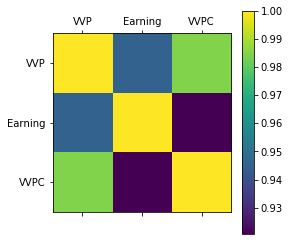

In [369]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

In [370]:
corr = df.corr()
corr.style.background_gradient()

,VVP,Earning,VVPC
VVP,1,0.945576,0.985082
Earning,0.945576,1,0.920478
VVPC,0.985082,0.920478,1


In [372]:
first = 1 + 0.945576 + 0.985082
second = 0.945576 + 1 + 0.920478
third = 0.985082 + 0.920478 + 1
print('Показатель 1 = ', first, 'Показатель 2 = ', second, 'Показатель 3 = ', third)

Показатель 1 =  2.930658 Показатель 2 =  2.866054 Показатель 3 =  2.90556


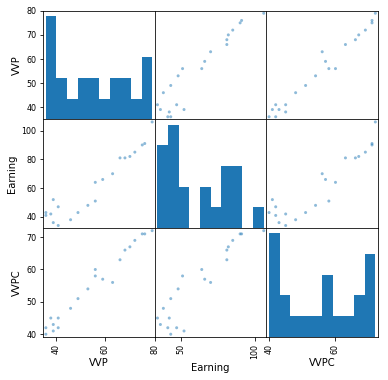

In [373]:
pd.plotting.scatter_matrix(df, figsize=(6, 6))
plt.show()

In [400]:
X = df[['Earning','VVPC']]
Y = df['VVP']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    VVP   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     446.9
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           4.55e-16
Time:                        16:15:59   Log-Likelihood:                -44.558
No. Observations:                  21   AIC:                             95.12
Df Residuals:                      18   BIC:                             98.25
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.7525      3.241     -3.009      0.0

In [411]:
trendEarning = 0
trendVVPC = 0

for i in range(1, 26):
    trendEarning = i * -3.1338 + 95.9476    
    trendVVPC = i * -1.7805 + 74.8714
    predict = trendEarning * 0.1715 + 0.9831 * trendVVPC - 9.7525
    print('ВВП модель -', i, 'Значение -', predict)
    print('Доходы Тренд -', i, 'Значение -', trendEarning)
    print('ВВП на на душу Тренд -', i, 'Значение -', trendVVPC)
    print('----------')

ВВП модель - 1 Значение - 78.02073049
Доходы Тренд - 1 Значение - 92.8138
ВВП на на душу Тренд - 1 Значение - 73.09089999999999
----------
ВВП модель - 2 Значение - 75.73287423999999
Доходы Тренд - 2 Значение - 89.67999999999999
ВВП на на душу Тренд - 2 Значение - 71.31039999999999
----------
ВВП модель - 3 Значение - 73.44501799
Доходы Тренд - 3 Значение - 86.5462
ВВП на на душу Тренд - 3 Значение - 69.5299
----------
ВВП модель - 4 Значение - 71.15716173999999
Доходы Тренд - 4 Значение - 83.41239999999999
ВВП на на душу Тренд - 4 Значение - 67.7494
----------
ВВП модель - 5 Значение - 68.86930548999999
Доходы Тренд - 5 Значение - 80.2786
ВВП на на душу Тренд - 5 Значение - 65.96889999999999
----------
ВВП модель - 6 Значение - 66.58144924
Доходы Тренд - 6 Значение - 77.1448
ВВП на на душу Тренд - 6 Значение - 64.1884
----------
ВВП модель - 7 Значение - 64.29359299000001
Доходы Тренд - 7 Значение - 74.011
ВВП на на душу Тренд - 7 Значение - 62.4079
----------
ВВП модель - 8 Значение 